# Setup


In [33]:
import sklearn
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

# MNIST

In [4]:
minst = fetch_openml('mnist_784', version=1, as_frame=False)
minst.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
X, y = minst['data'], minst['target']
X.shape, y.shape

((70000, 784), (70000,))

In [14]:
np.sqrt(784)

28.0

(-0.5, 27.5, 27.5, -0.5)

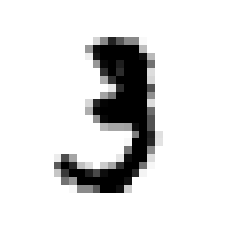

In [27]:
some_digit = X[10]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")

In [26]:
y[10]

'3'

In [28]:
def plot_digit(data):
  image = some_digit.reshape(28,28)
  plt.imshow(image, cmap=mpl.cm.binary, interpolation = "nearest")
  plt.axis("off")

In [46]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [47]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [50]:
sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([some_digit])

array([False])

In [55]:
accuracy = cross_val_score(sgd_clf, X_train, y_train_5, cv = 10, scoring = "accuracy")
np.mean(accuracy)

0.9635333333333334